In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

In [136]:
dfmovies = pd.read_csv('../Datasets/Movies/movies_description.txt', sep='|', header=None)
dfusers = pd.read_csv('../Datasets/Movies/users_description.txt', sep='|', header=None)
dfscores = pd.read_csv('../Datasets/Movies/movies_users.txt', sep='\t', header=None)

In [137]:
dfmovies.columns = ['id', 'title', 'date', 'NA', 'link', 'Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genres = ['Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
moviesT = dfmovies.values[:,1]

In [149]:
nusers = len(dfusers.values)
nmovies = len(dfmovies.values)
evaluations = np.zeros((nmovies,nusers))
evaluations[ dfscores.values[:,1]-1, dfscores.values[:,0]-1 ] = dfscores.values[:,2]
avgs = []
for i in range(len(evaluations)):
    avgs.append(np.sum(evaluations[i])/np.sum(evaluations[i,:]!=0))

df = dfmovies[genres].copy()
df['Avg'] = avgs
df.index = moviesT
df

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg
Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319
GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333
Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239
Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000
B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000
Sliding Doors (1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000
You So Crazy (1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000


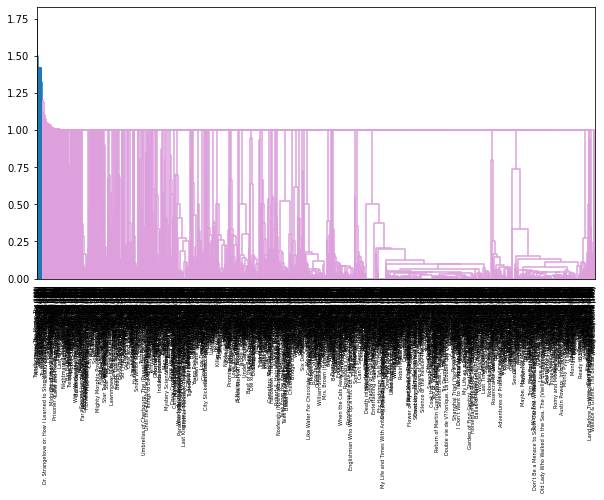

In [139]:
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])
plt.figure(figsize=(10,5))
Z = hierarchy.linkage(df)
dn = hierarchy.dendrogram(Z, labels=moviesT)
plt.show()

In [140]:
for i in range(len(dfmovies)):
    print(dfmovies['id'][i], dfmovies['title'][i])

1 Toy Story (1995)
2 GoldenEye (1995)
3 Four Rooms (1995)
4 Get Shorty (1995)
5 Copycat (1995)
6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
7 Twelve Monkeys (1995)
8 Babe (1995)
9 Dead Man Walking (1995)
10 Richard III (1995)
11 Seven (Se7en) (1995)
12 Usual Suspects, The (1995)
13 Mighty Aphrodite (1995)
14 Postino, Il (1994)
15 Mr. Holland's Opus (1995)
16 French Twist (Gazon maudit) (1995)
17 From Dusk Till Dawn (1996)
18 White Balloon, The (1995)
19 Antonia's Line (1995)
20 Angels and Insects (1995)
21 Muppet Treasure Island (1996)
22 Braveheart (1995)
23 Taxi Driver (1976)
24 Rumble in the Bronx (1995)
25 Birdcage, The (1996)
26 Brothers McMullen, The (1995)
27 Bad Boys (1995)
28 Apollo 13 (1995)
29 Batman Forever (1995)
30 Belle de jour (1967)
31 Crimson Tide (1995)
32 Crumb (1994)
33 Desperado (1995)
34 Doom Generation, The (1995)
35 Free Willy 2: The Adventure Home (1995)
36 Mad Love (1995)
37 Nadja (1994)
38 Net, The (1995)
39 Strange Days (1995)
40 To Wong Foo, Than

1611 Intimate Relations (1996)
1612 Leading Man, The (1996)
1613 Tokyo Fist (1995)
1614 Reluctant Debutante, The (1958)
1615 Warriors of Virtue (1997)
1616 Desert Winds (1995)
1617 Hugo Pool (1997)
1618 King of New York (1990)
1619 All Things Fair (1996)
1620 Sixth Man, The (1997)
1621 Butterfly Kiss (1995)
1622 Paris, France (1993)
1623 C????onie, La (1995)
1624 Hush (1998)
1625 Nightwatch (1997)
1626 Nobody Loves Me (Keiner liebt mich) (1994)
1627 Wife, The (1995)
1628 Lamerica (1994)
1629 Nico Icon (1995)
1630 Silence of the Palace, The (Saimt el Qusur) (1994)
1631 Slingshot, The (1993)
1632 Land and Freedom (Tierra y libertad) (1995)
1633 ? k??dum klaka (Cold Fever) (1994)
1634 Etz Hadomim Tafus (Under the Domin Tree) (1994)
1635 Two Friends (1986) 
1636 Brothers in Trouble (1995)
1637 Girls Town (1996)
1638 Normal Life (1996)
1639 Bitter Sugar (Azucar Amargo) (1996)
1640 Eighth Day, The (1996)
1641 Dadetown (1995)
1642 Some Mother's Son (1996)
1643 Angel Baby (1995)
1644 Sudden Ma

In [147]:
favMovies = list(map(int,input("Write 5 ID's of your favourite movies: ").strip().split()))[:5]

Write 5 ID's of your favourite movies: 1 288 50 71 313


In [148]:
alreadyRecommended = []
for m in favMovies:
    ya = False
    i = 0.0
    while(True):
        print(i)
        g = hierarchy.fcluster(Z, criterion='distance', t=i)
        p = m - 1
        rMovies = g == g[p]
        rMovies = np.where(rMovies)[0]
        for possibleMovie in rMovies:
            pM = possibleMovie + 1
            if pM not in favMovies and pM not in alreadyRecommended:
                print(i, pM, moviesT[possibleMovie])
                alreadyRecommended.append(pM)
                ya = True
                break
        if ya:
            break
        i += 0.1

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.0999999999999999 2 GoldenEye (1995)
0.0
0.1
0.2
0.30000000000000004
0.30000000000000004 895 Scream 2 (1997)
0.0
0.1
0.2
0.30000000000000004
0.4
0.4 181 Return of the Jedi (1983)
0.0
0.1
0.1 99 Snow White and the Seven Dwarfs (1937)
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.5 207 Cyrano de Bergerac (1990)


In [143]:
for m in favMovies:
    r = dfmovies.loc[dfmovies['id'] == m]
    for g in genres:
        print(g)
        if r[g].all(): 
            similarMovies = dfmovies.loc[dfmovies[g] == True]
            print(similarMovies['title'])
    print()

Unknown
Action
Adventure
Animation
0                                        Toy Story (1995)
70                                  Lion King, The (1994)
94                                         Aladdin (1992)
98                 Snow White and the Seven Dwarfs (1937)
100                                    Heavy Metal (1981)
101                                Aristocats, The (1970)
102                        All Dogs Go to Heaven 2 (1996)
113     Wallace & Gromit: The Best of Aardman Animatio...
168                            Wrong Trousers, The (1993)
188                               Grand Day Out, A (1992)
205                                          Akira (1988)
239                Beavis and Butt-head Do America (1996)
403                                      Pinocchio (1940)
407                                 Close Shave, A (1995)
417                                     Cinderella (1950)
419                            Alice in Wonderland (1951)
421                Aladdin and the Ki

In [144]:
#How many movies we have by genre
for g in genres:
    similarMovies = dfmovies.loc[dfmovies[g] == True]
    print(g, len(similarMovies))
similarMovies = dfmovies.loc[dfmovies['Unknown'] == True]
print(similarMovies)

Unknown 2
Action 251
Adventure 135
Animation 42
Children's 122
Comedy 505
Crime 109
Documentary 50
Drama 725
Fantasy 22
Film-Noir 24
Horror 92
Musical 56
Mystery 61
Romance 247
Sci-Fi 101
Thriller 251
War 71
Western 27
        id                title        date  NA  \
266    267              unknown         NaN NaN   
1372  1373  Good Morning (1971)  4-Feb-1971 NaN   

                                                   link  Unknown  Action  \
266                                                 NaN        1       0   
1372  http://us.imdb.com/M/title-exact?Good%20Mornin...        1       0   

      Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  \
266           0          0           0  ...        0          0       0   
1372          0          0           0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266         0        0        0       0         0    0        0  
1372        0        0        0       0 